In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
import seaborn as sns
import plotly.express as px
#import statsmodels.api as sm

In [51]:
druck_5T = query_table(table='r707lv_f4032_5T')
trock_5T = query_table(table='r707lv_trockner_5T')
puder_5T = query_table(table='r707lv_f4034_5T')
vari_5T = query_table(table='r707lv_vari_air_5T')

In [52]:
px.line(
    x=druck_5T.index, y=druck_5T.kw * 1000, 
    title='R707LV - Druckmaschine',
    labels={
        'x': 'Time',
        'y': 'Watts'
    })

In [56]:
px.scatter(
    x=trock_5T.index.day, y=trock_5T.kw * 1000, 
    title='R707LV - Trockner Maschine',
    labels={
        'x': 'Time',
        'y': 'Watts'
    })

In [ ]:
px.line(
    x=puder_5T.index, y=puder_5T.kw * 1000, 
    title='R707LV - Puderabsaugung Maschine',
    labels={
        'x': 'Time',
        'y': 'Watts'
    })

In [ ]:
px.line(
    x=vari_5T.index, y=vari_5T.kw * 1000, 
    title='R707LV - Vari Air',
    labels={
        'x': 'Time',
        'y': 'Watts'
    })

### Cross Correlation of Components in R707LV 

In [ ]:
def cross_correlation(feat1, feat2):
    cross_corr = sm.tsa.stattools.ccf(feat1, feat2, adjusted=False)
    return cross_corr

In [ ]:
cc_1 = cross_correlation(vari_5T.p, puder_5T.p)
cc_2 = cross_correlation(vari_5T.p, trock_5T.p)
cc_3 = cross_correlation(vari_5T.p, druck_5T.p)

cc_4 = cross_correlation(puder_5T.p, druck_5T.p)
cc_5 = cross_correlation(puder_5T.p, trock_5T.p)
cc_8 = cross_correlation(trock_5T.p, druck_5T.p)

In [ ]:
def plot_autocorr(x, axis=None, plot_marker=True):

    if not axis:
        _, axis = plt.subplots(figsize=(20, 7))

    if plot_marker:
        axis.plot(x, 'o')

    axis.vlines(range(len(x)), [0], x)
    axis.axhline()

    return axis

In [ ]:
plot_autocorr(cc_1, plot_marker=True) 
plt.title('Vari Air & Puder.')
plt.show()

In [ ]:
plot_autocorr(cc_2, plot_marker=True)
plt.title('Vari Air & Trock.') 
plt.show()

In [ ]:
plot_autocorr(cc_3, plot_marker=True) 
plt.title('Vari Air & Druck.')
plt.show()

In [ ]:
plot_autocorr(cc_4, plot_marker=True) 
plt.title('Puder. & Druck.')
plt.show()

In [ ]:
plot_autocorr(cc_5, plot_marker=True) 
plt.title('Puder. & Trock.')
plt.show()

In [ ]:
plot_autocorr(cc_8, plot_marker=True) 
plt.title('Trock. & Druck.')
plt.show()

### Correlation Coefficient of Components in R707LV

In [ ]:
puder_5T.p.values

In [ ]:
r707lv_dict = {
    'pudermaschine': puder_5T.p.values,
    'trockner': trock_5T.p.values,
    'vari_air': vari_5T.p.values,
    'druckmaschine': druck_5T.p.values
    }

In [ ]:
r707lv__log_dict = {
    'pudermaschine': np.log(puder_5T.p.values) - np.log(puder_5T.p.shift(1)),
    'trockner': np.log(trock_5T.p.values) - np.log(trock_5T.p.shift(1)),
    'vari_air': np.log(vari_5T.p.values) - np.log(vari_5T.p.shift(1)),
    'druckmaschine': np.log(druck_5T.p.values) - np.log(druck_5T.p.shift(1))
    }

In [ ]:
r707lv = pd.DataFrame.from_dict(
    data=r707lv_dict)

r707lv_log = pd.DataFrame.from_dict(
    data=r707lv__log_dict)

In [ ]:
r707lv_corr = r707lv.corr()
mask = np.zeros_like(r707lv_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 8))
sns.heatmap(r707lv_corr, cmap="YlGnBu", mask=mask, annot=True)
plt.title('R707LV Component Power Correlations')
sns.set(font_scale=1.4)
plt.show()

In [ ]:
r707lv_corr = r707lv_log.corr()
mask = np.zeros_like(r707lv_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 8))
sns.heatmap(r707lv_corr, cmap="YlGnBu", mask=mask, annot=True)
plt.title('R707LV Component Power Correlations - Percent Changes in Power')
sns.set(font_scale=1.4)
plt.show()

### Day + Hour Heatmap For Each Component

In [ ]:
druck_1H = query_table(table='r707lv_f4032_1H')
trock_1H = query_table(table='r707lv_trockner_1H')
puder_1H = query_table(table='r707lv_f4034_1H')
vari_1H = query_table(table='r707lv_vari_air_1H')

In [ ]:
def add_time(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['dow'] = df.index.dayofweek
    df['day_name'] = df.index.day_name().values
    return df

In [ ]:
def pivot_heatmap(df):

    df_time = add_time(df)

    df_pivot = df_time.pivot(
    index='day',
    columns='hour',
    values='kw'
    )
    df_pivot.dropna(axis=0, how='any', inplace=True)

    plt.figure(figsize=(12, 8))
    return sns.heatmap(df_pivot)

In [ ]:
pivot_heatmap(trock_1H)
plt.title('Trockner')
plt.show()

In [ ]:
pivot_heatmap(puder_1H)
plt.title('Pudermaschine')
plt.show()

In [ ]:
pivot_heatmap(vari_1H)
plt.title('Vari Air')
plt.show()

In [ ]:
pivot_heatmap(druck_1H)
plt.title('Druckmaschine')
plt.show()

In [ ]:
trock_1H

In [ ]:
trock_1H.day_name.unique()

In [48]:
piv = trock_1H.pivot(
    index=['day', 'day_name'],
    columns='hour',
    values='kw'
)

piv.dropna(axis=0, how='any', inplace=True)

piv

,hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,day_name,,,,,,,,,,,,,,,,,,,,,
8,Friday,2.724132,2.498901,2.494401,2.489617,2.481581,2.475350,2.469054,2.457149,2.458990,2.794823,...,3.644433,3.278278,3.805968,3.124833,3.378348,2.780968,2.699059,3.000841,2.576807,2.899272
9,Saturday,2.615133,2.490901,2.494496,2.497826,2.498368,2.498343,2.493371,2.501283,2.482724,2.480852,...,2.745757,2.819623,2.750382,2.426396,2.981662,2.500128,3.060265,2.493791,2.502354,2.500748
10,Sunday,2.503519,2.508266,2.510809,2.491249,2.505467,2.505315,2.512511,2.514193,2.510461,2.503716,...,2.711692,2.808825,2.900225,2.422832,2.638538,2.883522,2.497933,2.499059,2.500582,2.503587
11,Monday,2.508404,2.512784,2.510358,2.506675,2.501694,2.478073,2.451323,2.262263,2.279689,2.482276,...,2.459847,2.619715,3.247255,2.667340,2.417993,2.470793,2.725815,3.128856,2.692939,2.501117
12,Tuesday,2.501820,2.497538,2.496974,2.493643,2.490088,2.482575,2.479921,2.466360,2.469374,2.469664,...,3.135516,2.897516,3.140267,2.875522,2.819192,2.974508,3.234918,2.974344,3.150438,2.908011
13,Wednesday,2.953280,2.588250,2.490370,2.482621,2.488693,2.478583,2.465911,2.463080,2.466147,2.464467,...,4.252632,3.914833,4.746567,3.932648,4.605567,4.215301,4.161777,3.904147,3.475999,2.509688
14,Thursday,2.505400,2.500300,2.504638,2.503258,2.502796,2.495266,2.482838,2.475680,2.473189,2.477815,...,4.135492,4.424599,3.297485,3.904625,4.651737,3.921162,3.394908,3.128410,2.881947,2.510975
15,Friday,2.504513,2.503640,2.496731,2.503652,2.501489,2.492072,2.484182,2.472913,2.475446,2.473148,...,4.313872,4.037658,3.759233,2.948843,3.145365,3.196067,2.487999,2.485720,2.496653,2.506556
16,Saturday,2.504974,2.501329,2.504029,2.493717,2.497078,2.494241,2.499897,2.501991,2.492975,2.495920,...,3.045579,2.985087,3.340191,2.923274,2.491899,2.498717,2.498049,2.500875,2.495936,2.493470


<AxesSubplot:xlabel='hour', ylabel='day-day_name'>

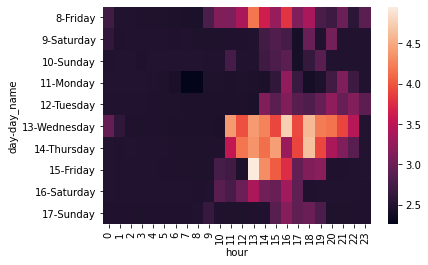

In [49]:
sns.heatmap(piv)